# Multiple linear regression model
### Let's mimic the process of building our trading model of SPY, base on the historical data of different stock markets

In [ ]:
import pandas as pd
#import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!ls ../data/indice

In [ ]:
# import all stock market data into DataFrame
aord = pd.DataFrame.from_csv('../data/indice/ALLOrdinary.csv')
nikkei = pd.DataFrame.from_csv('../data/indice/Nikkei225.csv')
hsi = pd.DataFrame.from_csv('../data/indice/HSI.csv')
daxi = pd.DataFrame.from_csv('../data/indice/DAXI.csv')
cac40 = pd.DataFrame.from_csv('../data/indice/CAC40.csv')
sp500 = pd.DataFrame.from_csv('../data/indice/SP500.csv')
dji = pd.DataFrame.from_csv('../data/indice/DJI.csv')
nasdaq = pd.DataFrame.from_csv('../data/indice/nasdaq_composite.csv')
spy = pd.DataFrame.from_csv('../data/indice/SPY.csv')

In [ ]:
nasdaq.head()

## Step 1: Data Munging

In [ ]:
# Due to the timezone issues, we extract and calculate appropriate stock market data for analysis
# Indicepanel is the DataFrame of our trading model
indicepanel=pd.DataFrame(index=spy.index)

indicepanel['spy']=spy['Open'].shift(-1)-spy['Open']
indicepanel['spy_lag1']=indicepanel['spy'].shift(1)
indicepanel['sp500']=sp500["Open"]-sp500['Open'].shift(1)
indicepanel['nasdaq']=nasdaq['Open']-nasdaq['Open'].shift(1)
indicepanel['dji']=dji['Open']-dji['Open'].shift(1)

indicepanel['cac40']=cac40['Open']-cac40['Open'].shift(1)
indicepanel['daxi']=daxi['Open']-daxi['Open'].shift(1)

indicepanel['aord']=aord['Close']-aord['Open']
indicepanel['hsi']=hsi['Close']-hsi['Open']
indicepanel['nikkei']=nikkei['Close']-nikkei['Open']
indicepanel['Price']=spy['Open']

In [ ]:
indicepanel.head()

In [ ]:
# Lets check whether do we have NaN values in indicepanel
indicepanel.isnull().sum()

In [ ]:
# We can use method 'fillna()' from dataframe to forward filling the Nan values
# Then we can drop the reminding Nan values
indicepanel = indicepanel.fillna(method='ffill')
indicepanel = indicepanel.dropna()

In [ ]:
# Lets check whether do we have Nan values in indicepanel now
indicepanel.isnull().sum()

In [ ]:
# save this indicepanel for part 4.5
path_save = '../data/indice/indicepanel.csv'
indicepanel.to_csv(path_save)

In [ ]:
print(indicepanel.shape)

## Step 2: Data Spliting

In [ ]:
#split the data into (1)train set and (2)test set

Train = indicepanel.iloc[-2000:-1000, :]
Test = indicepanel.iloc[-1000:, :]
print(Train.shape, Test.shape)

In [ ]:
InputDataTarget = indicepanel.iloc[:,0]
InputDataX = indicepanel.iloc[:, 1:indicepanel.shape[1]]
#print (InputDataX)
X= np.matrix(InputDataX.values)
y= np.matrix(InputDataY.values)
print (X.shape)
print (Y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Step 3: Explore the train data set

In [ ]:
# Generate scatter matrix among all stock markets (and the price of SPY) to observe the association

from pandas.tools.plotting import scatter_matrix
sm = scatter_matrix(Train, figsize=(10, 10))

## Step 4: Check the correlation of each index between spy

In [ ]:
# Find the indice with largest correlation
corr_array = Train.iloc[:, :-1].corr()['spy']
print(corr_array)

In [ ]:
lm = LinearRegression().fit(X_train, y_train)

## Step 5: Make prediction

In [94]:
TrainPredictedY = lm.predict(X_train)
TestPredictedY = lm.predict(X_test)
from sklearn.metrics import mean_squared_error



Training MSE is 2.553321176267321
Testing MSE is 2.471739133541726


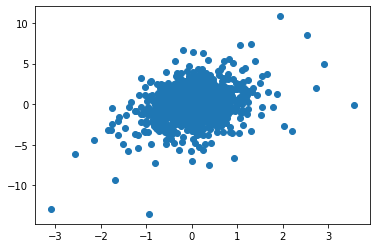

In [85]:
plt.scatter(TrainPredictedY.tolist(), y_train.tolist())

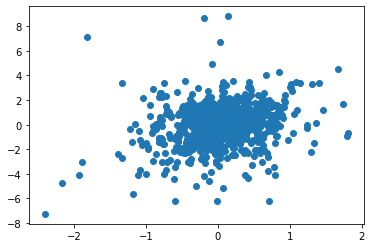

In [86]:
plt.scatter(TestPredictedY.tolist(), y_test.tolist())

## Step 6: Model evaluation - Statistical standard

We can measure the performance of our model using some statistical metrics - **MSE**

In [95]:
print ('Training MSE is', 
       mean_squared_error(TrainPredictedY.tolist(), y_train.tolist()))
print ('Testing MSE is', 
       mean_squared_error(TestPredictedY.tolist(), y_test.tolist()))

Training MSE is 2.553321176267321
Testing MSE is 2.471739133541726
